In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly

In [36]:
# Load dataset
data = pd.read_csv(r'C:\Users\poppo\Desktop\DEPI\Project\healthcare_dataset.csv')
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [39]:
data.shape

(55500, 15)

In [40]:
# Check for missing values
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [41]:
#change datatype to datetime
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [42]:
# Data after change datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [43]:
# lengh of stay at hospital
data['Num of Days at hospital'] = (data['Discharge Date'] - data['Date of Admission']).dt.days

In [44]:
data.drop(['Name', 'Date of Admission', 'Discharge Date'], axis=1, inplace=True)

In [50]:
columns = ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication','Num of Days at hospital',  'Test Results']

data = data[columns]

In [86]:
data.describe()

,Age,Billing Amount,Room Number,Num of Days at hospital
count,55500.000000,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829,15.509009
std,19.602454,14211.454431,115.243069,8.659600
min,13.000000,-2008.492140,101.000000,1.000000
25%,35.000000,13241.224652,202.000000,8.000000
50%,52.000000,25538.069376,302.000000,15.000000
75%,68.000000,37820.508436,401.000000,23.000000
max,89.000000,52764.276736,500.000000,30.000000


In [54]:
data.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Num of Days at hospital,Test Results
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,2,Normal
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,6,Inconclusive
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,15,Normal
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,30,Abnormal
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,20,Abnormal


In [55]:
data.shape

(55500, 13)

In [56]:
data.isnull().sum()

Age                        0
Gender                     0
Blood Type                 0
Medical Condition          0
Doctor                     0
Hospital                   0
Insurance Provider         0
Billing Amount             0
Room Number                0
Admission Type             0
Medication                 0
Num of Days at hospital    0
Test Results               0
dtype: int64

## Data Exploratory

In [57]:
# Group the data by Blood Type and Gender,
# count the number of entries in each group,
# reset the index to convert the groupby result into a DataFrame,
# then sort the groups in ascending order based on the count
blood_gender_group = data.groupby(['Blood Type', 'Gender']).size().reset_index(name='Count').sort_values(by='Count', ascending=True)
blood_gender_group

,Blood Type,Gender,Count
15,O-,Male,3365
8,B+,Female,3377
1,A+,Male,3392
4,AB+,Female,3438
2,A-,Female,3449
13,O+,Male,3453
6,AB-,Female,3461
10,B-,Female,3461
12,O+,Female,3464
11,B-,Male,3483


In [58]:
# Group the data by Test Results and Gender
test_gender_group = data.groupby(['Test Results', 'Gender']).size().reset_index(name='Count') 
test_gender_group

,Test Results,Gender,Count
0,Abnormal,Female,9338
1,Abnormal,Male,9289
2,Inconclusive,Female,9216
3,Inconclusive,Male,9140
4,Normal,Female,9172
5,Normal,Male,9345


In [59]:
# Display the unique values in the 'Medical Condition' column
data['Medical Condition'].unique()

array(['Cancer', 'Obesity', 'Diabetes', 'Asthma', 'Hypertension',
       'Arthritis'], dtype=object)

In [60]:
data['Medical Condition'].value_counts()

Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: Medical Condition, dtype: int64

In [61]:
data['Test Results'].value_counts()

Abnormal        18627
Normal          18517
Inconclusive    18356
Name: Test Results, dtype: int64

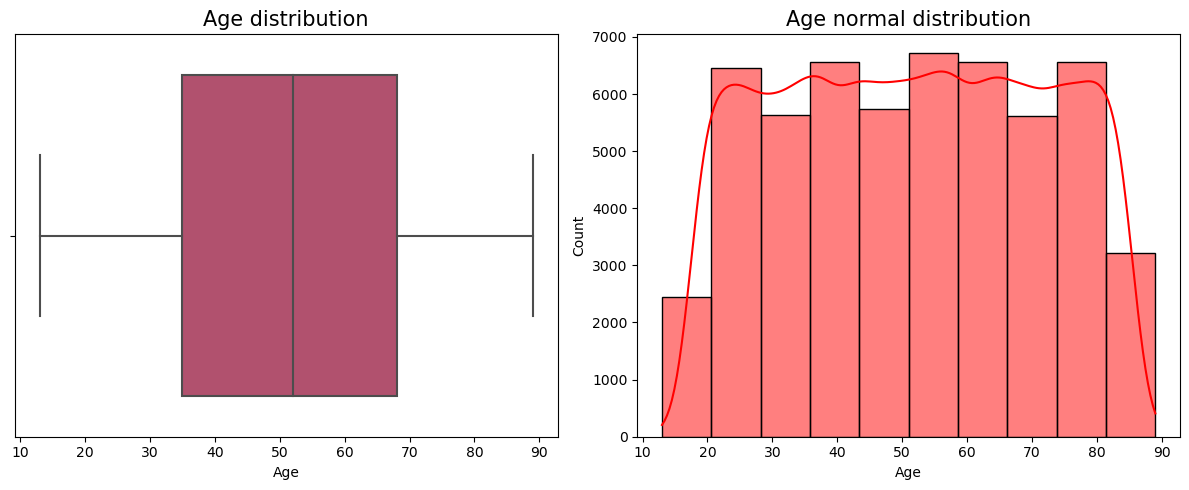

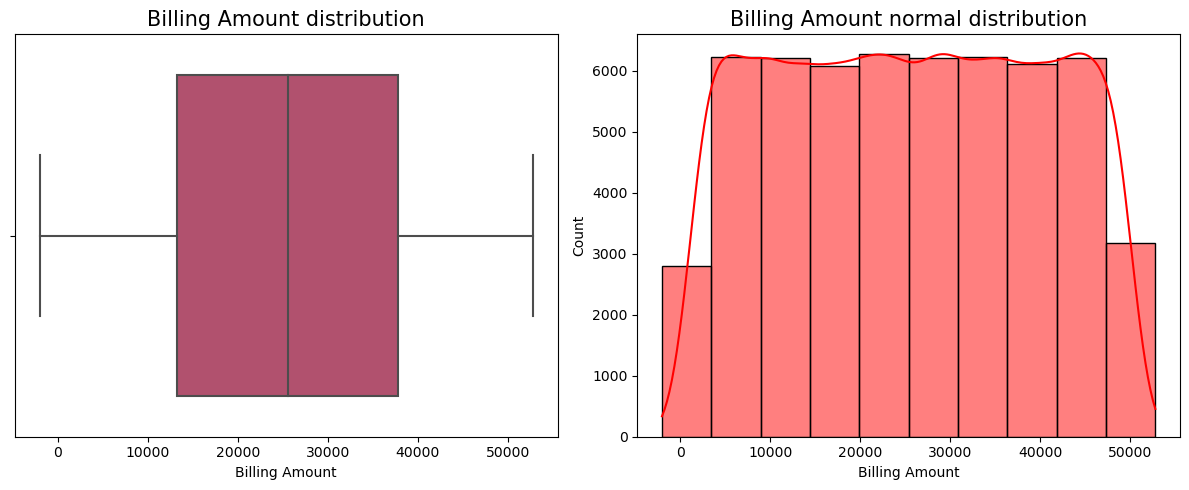

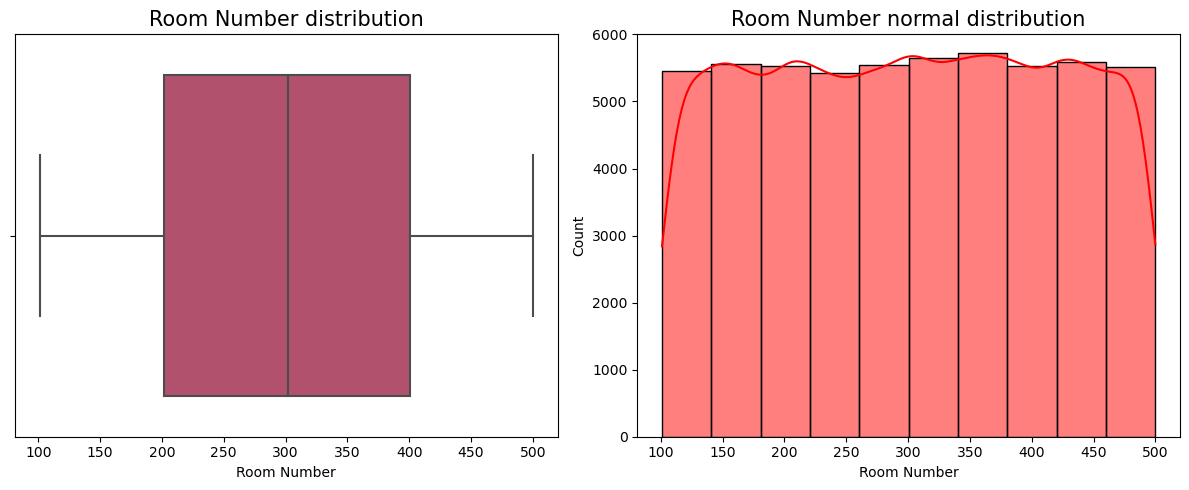

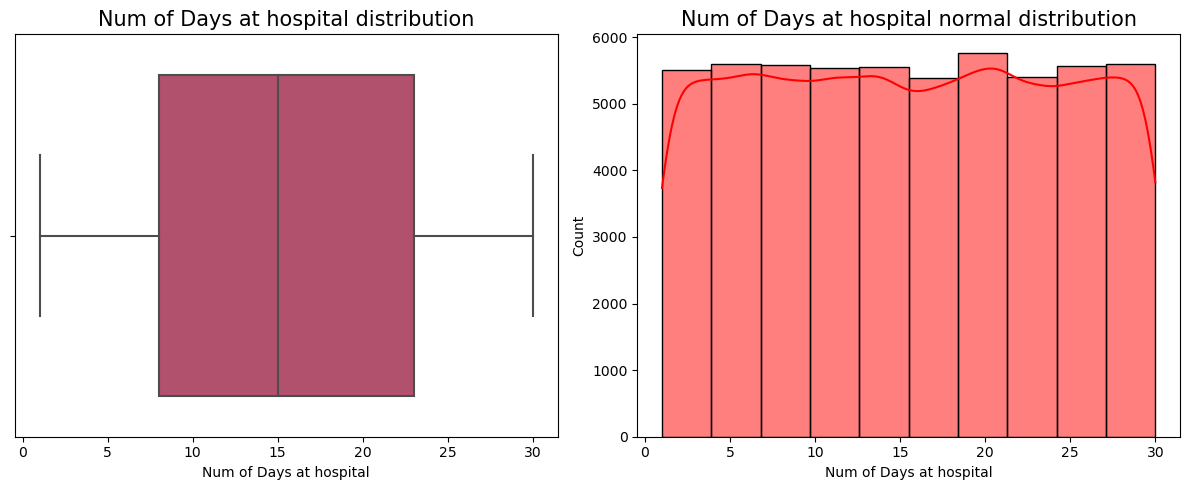

In [64]:
# For each numerical column, plot a boxplot and a histogram with KDE
numerical_cols = ['Age', 'Billing Amount', 'Room Number', 'Num of Days at hospital']
for i in numerical_cols:
    
    # Boxplot for distribution and outlier detection
    fig, ax = plt.subplots(1,2,figsize=(12,5))
    sns.boxplot(data=data, x=i, ax=ax[0], palette = 'flare')
    ax[0].set_title(f'{i} distribution', fontsize=15)
    
    # Histogram with KDE for normality visualization
    sns.histplot(data=data, x=i, kde=True, bins = 10, ax=ax[1], color="red")
    ax[1].set_title(f'{i} normal distribution', fontsize=15)
    plt.tight_layout()
    plt.show()

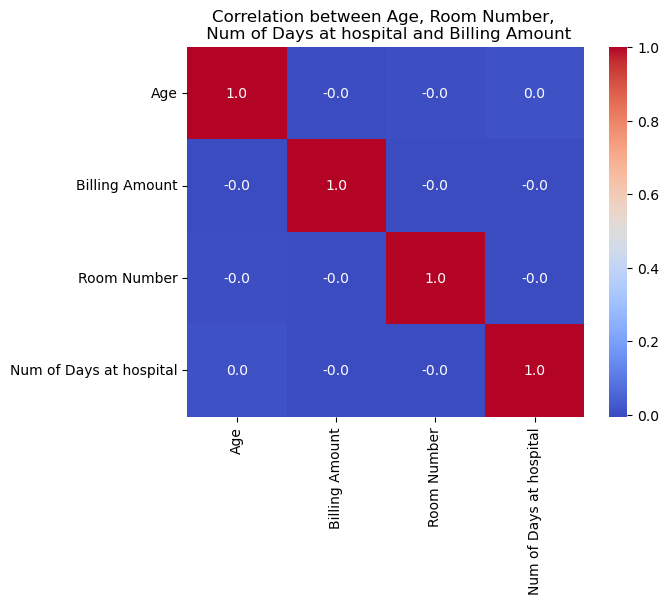

In [66]:
fig = plt.figsize=(15,5)
sns.heatmap(data=data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f" )
plt.title('Correlation between Age, Room Number, \n Num of Days at hospital and Billing Amount')
plt.show()

In [68]:
data.describe(include= "object").T

,count,unique,top,freq
Gender,55500,2,Male,27774
Blood Type,55500,8,A-,6969
Medical Condition,55500,6,Arthritis,9308
Doctor,55500,40341,Michael Smith,27
Hospital,55500,39876,LLC Smith,44
Insurance Provider,55500,5,Cigna,11249
Admission Type,55500,3,Elective,18655
Medication,55500,5,Lipitor,11140
Test Results,55500,3,Abnormal,18627


In [70]:
object_cols = data.select_dtypes(include=['object']).columns
# object_cols

In [73]:
# Analyze all object (categorical) columns in the dataset
unique_vals_analysis = pd.DataFrame(columns=['column','unique_value','num_of_unique_values'])
unique_rows=[]
for cols in object_cols:
    new_row={'column': cols, 'unique_value': data[cols].unique(), 'num_of_unique_values': data[cols].nunique()}
    unique_rows.append(new_row)
unique_vals_analysis = pd.DataFrame(unique_rows)
unique_vals_analysis.set_index('column',inplace=True)
unique_vals_analysis

,unique_value,num_of_unique_values
column,,
Gender,"[Male, Female]",2
Blood Type,"[B-, A+, A-, O+, AB+, AB-, B+, O-]",8
Medical Condition,"[Cancer, Obesity, Diabetes, Asthma, Hypertensi...",6
Doctor,"[Matthew Smith, Samantha Davies, Tiffany Mitch...",40341
Hospital,"[Sons and Miller, Kim Inc, Cook PLC, Hernandez...",39876
Insurance Provider,"[Blue Cross, Medicare, Aetna, UnitedHealthcare...",5
Admission Type,"[Urgent, Emergency, Elective]",3
Medication,"[Paracetamol, Ibuprofen, Aspirin, Penicillin, ...",5
Test Results,"[Normal, Inconclusive, Abnormal]",3


In [74]:
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition','Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

In [75]:
# Group data by Gender and calculate the total Billing Amount for each group
gender_billing = data.groupby('Gender')['Billing Amount'].sum().reset_index()

# convert the amounts to millions 
gender_billing['Billing Amount (in Millions)'] = gender_billing['Billing Amount'] / 1_000_000

print(gender_billing[['Gender', 'Billing Amount (in Millions)']])

   Gender  Billing Amount (in Millions)
0  Female                    706.199324
1    Male                    711.232719


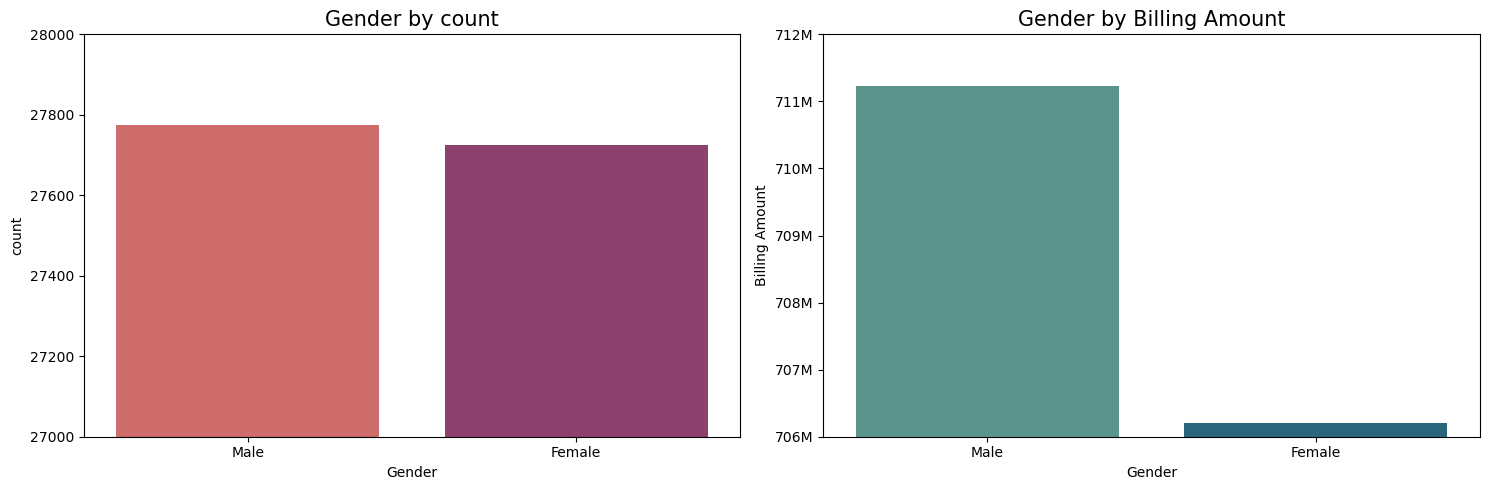

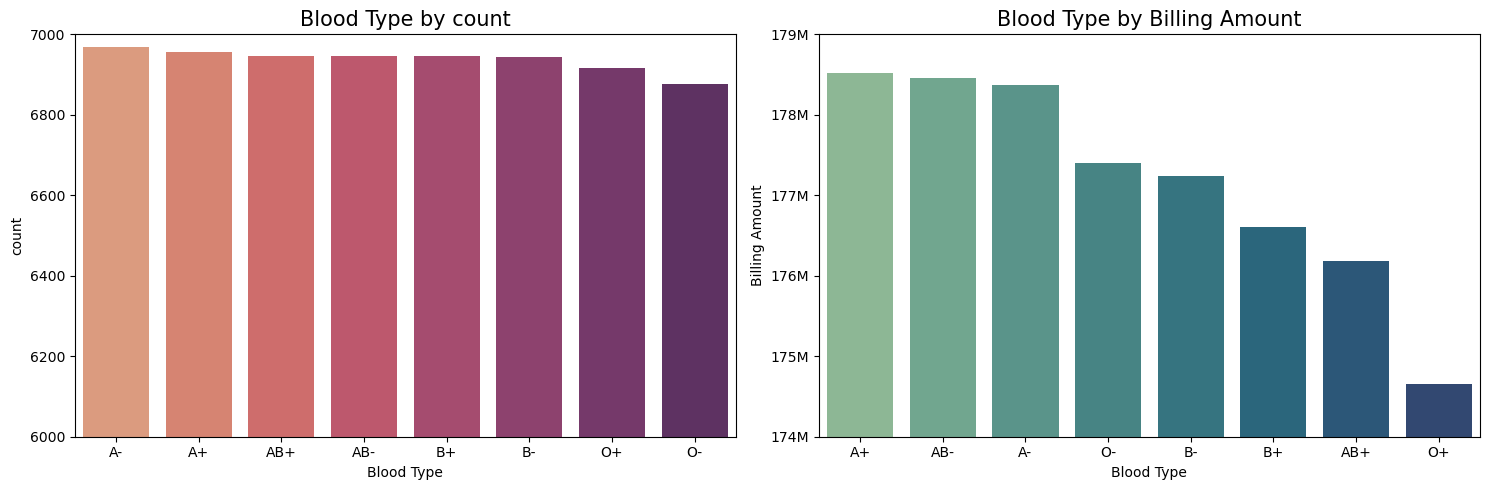

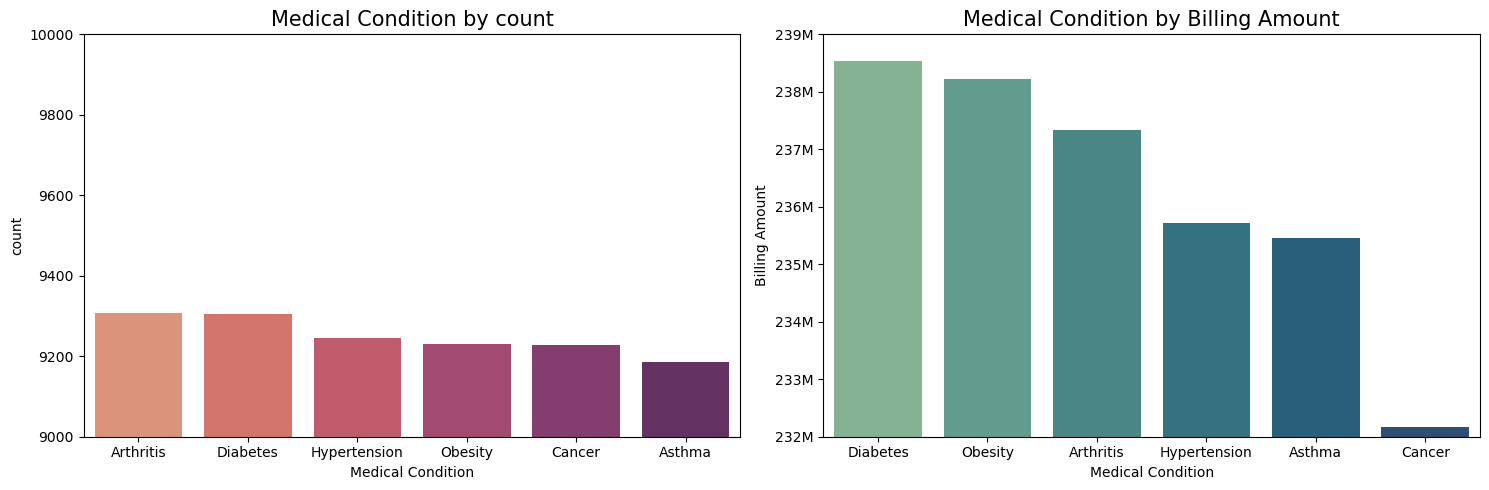

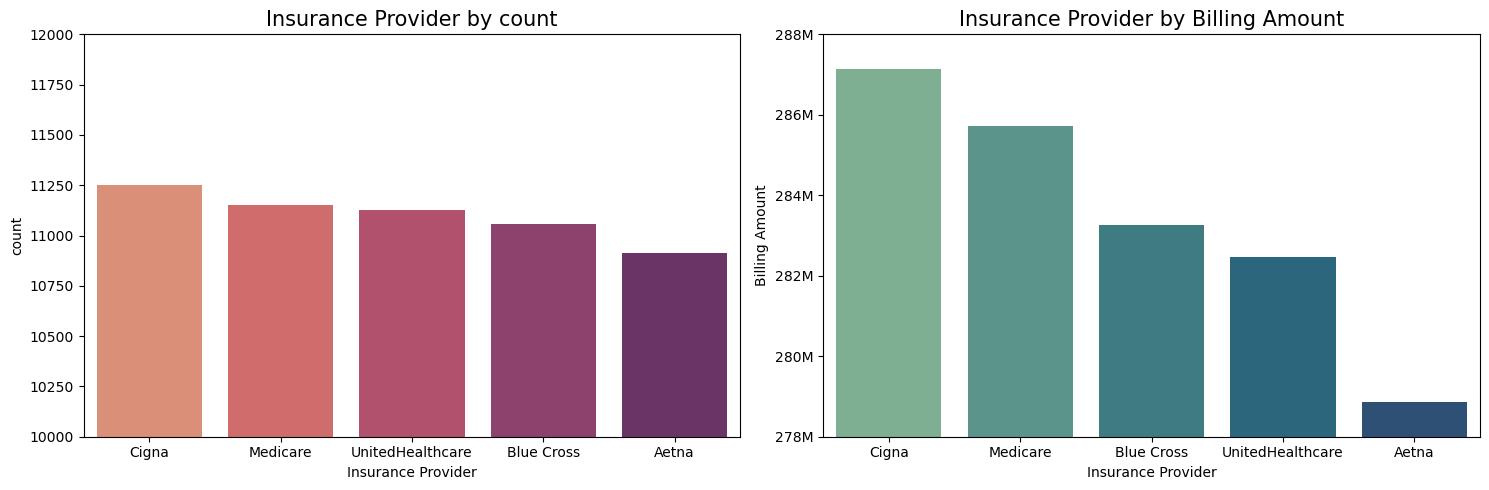

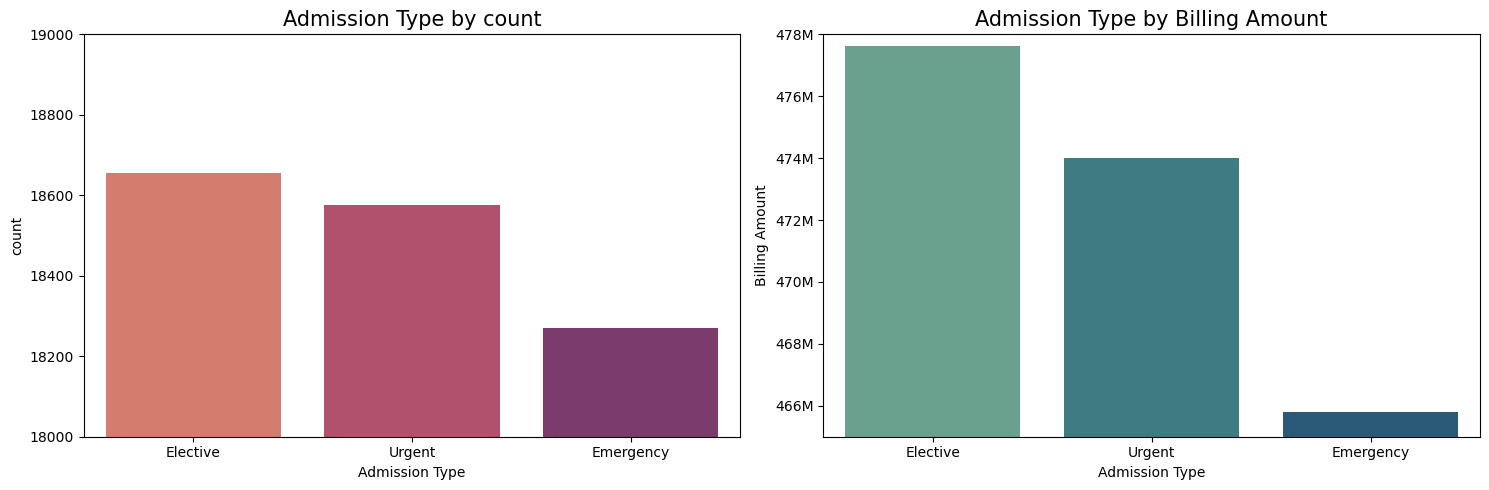

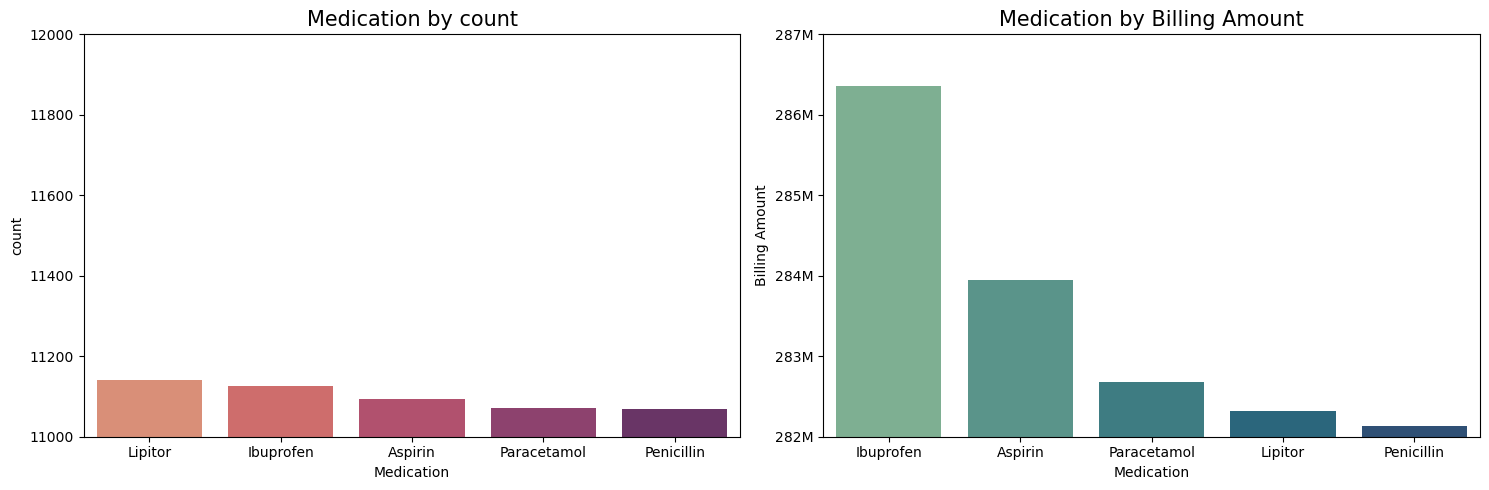

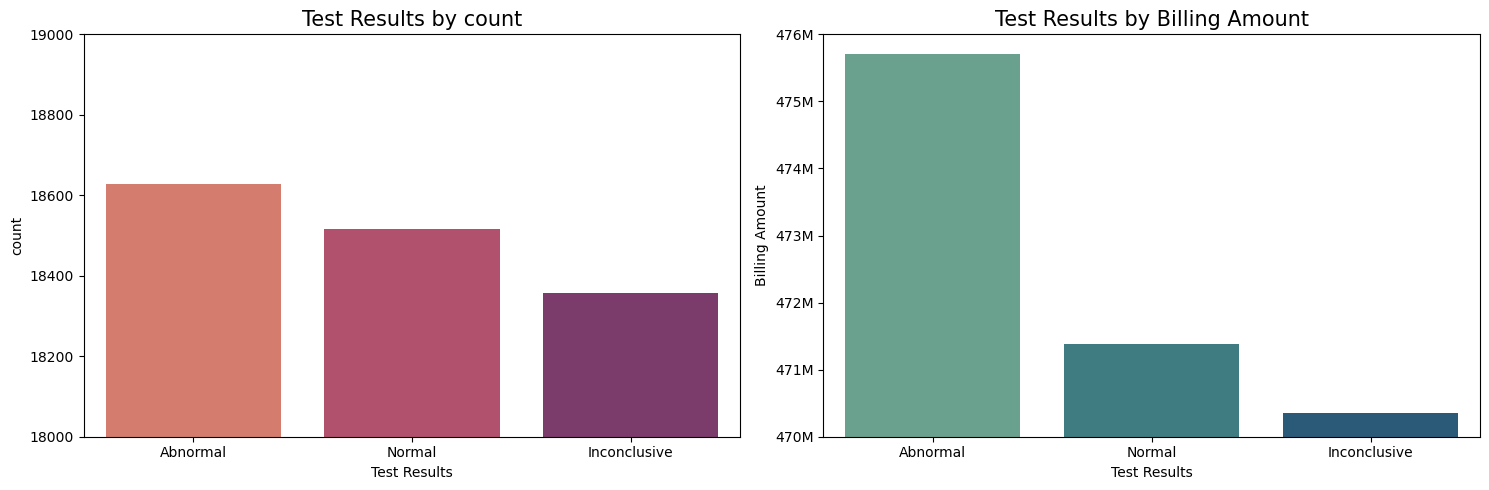

In [80]:
for i in categorical_cols:
    
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    
    value_counts_df = data[i].value_counts(sort='ascending').reset_index()
    value_counts_df.columns = [i, 'count']
    
    # Set y-axis limits for count chart
    y_min = value_counts_df['count'].min()
    y_max = value_counts_df['count'].max()
    y_min = max(0, (y_min // 1_000) * 1_000)
    y_max = ((y_max // 1_000) + 1) * 1_000
    
     # Plot bar chart of category counts
    sns.barplot(data=value_counts_df, x=i, y='count', palette = 'flare', ax=ax[0])
    ax[0].set_ylim(y_min, y_max)
    ax[0].set_title(f'{i} by count', fontsize = 15)
    
    
    group = data.groupby([i], sort=False)['Billing Amount'].sum().reset_index()
    group = group.sort_values('Billing Amount', ascending=False)
    billing_order = group[i]
    
    # Plot bar chart of billing amount per category
    sns.barplot(data=group , x=i, y='Billing Amount', ax=ax[1], palette = 'crest', order=billing_order)
    
    # Set y-axis limits and format in millions
    y_min = group['Billing Amount'].min()
    y_max = group['Billing Amount'].max()
    y_min_rounded = max(0, (y_min // 1_000_000) * 1_000_000)
    y_max_rounded = ((y_max // 1_000_000) + 1) * 1_000_000
    
    ax[1].set_ylim(y_min_rounded, y_max_rounded)
    ax[1].set_title(f'{i} by Billing Amount', fontsize =15)
    ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))
    
    plt.tight_layout()
    plt.show()

In [81]:
cols_without_mc = ['Gender', 'Blood Type','Insurance Provider', 'Admission Type', 'Medication', 'Test Results']

In [82]:
df_male = data[data['Gender']=='Male']
df_female = data[data['Gender']=='Female']

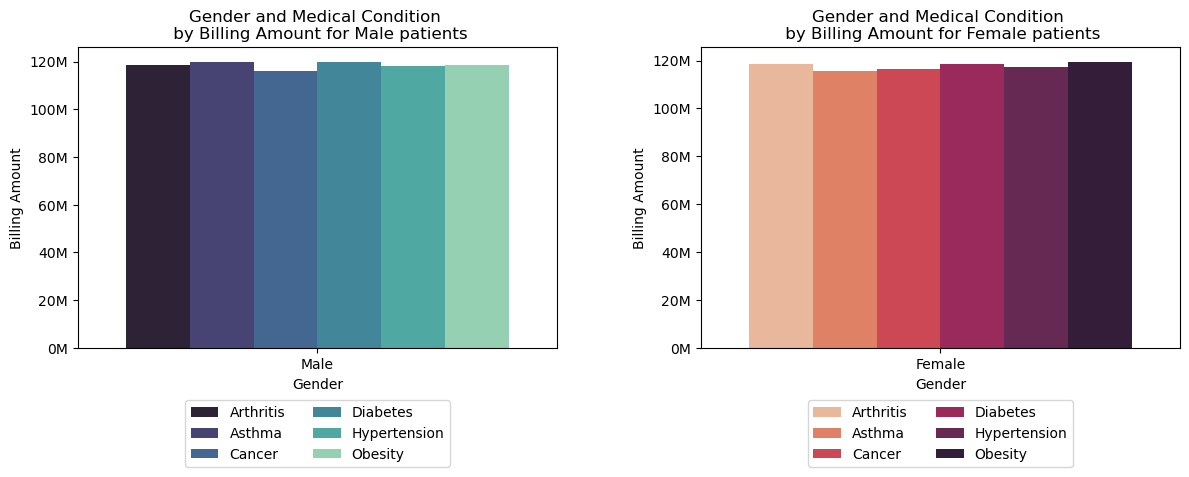

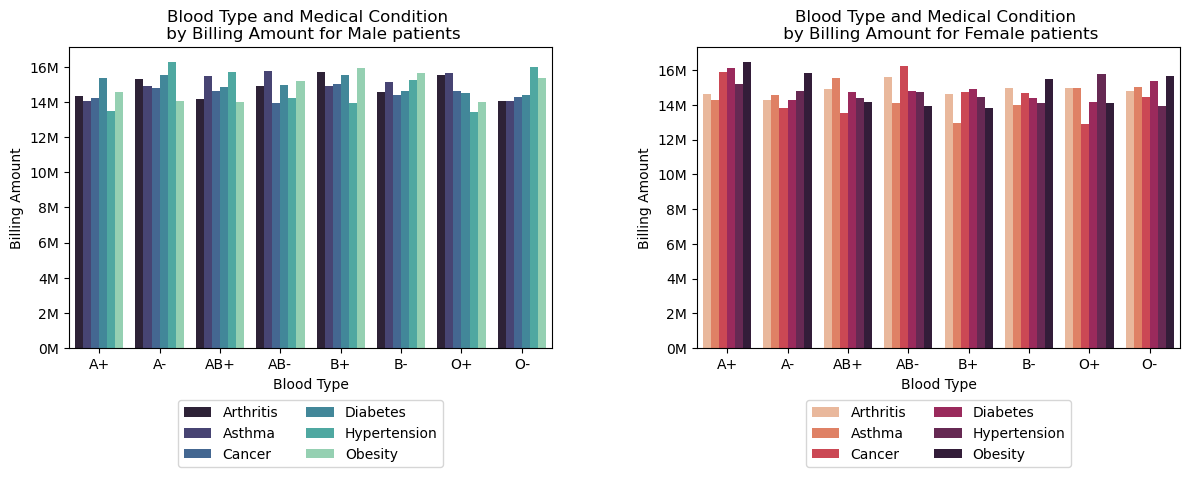

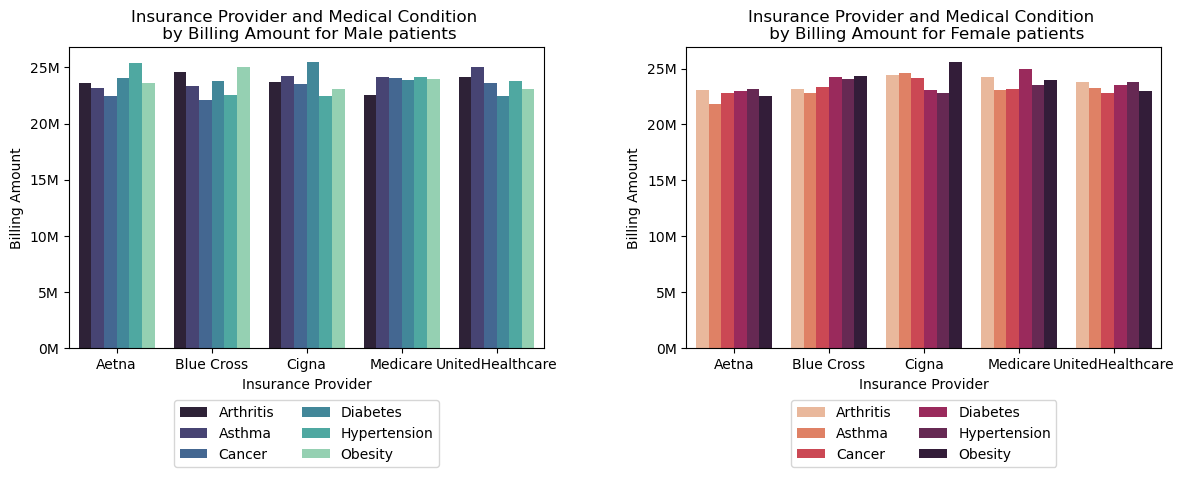

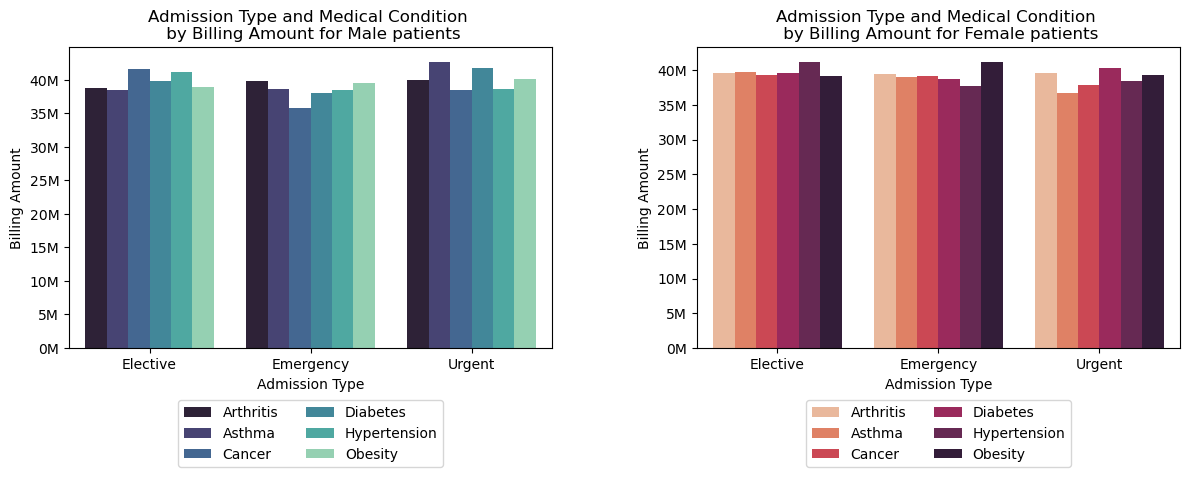

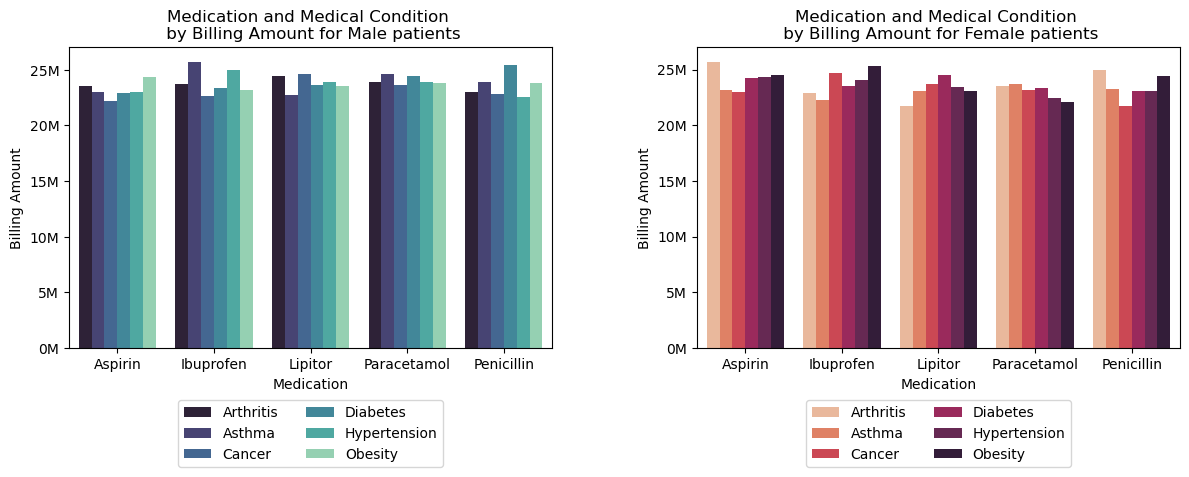

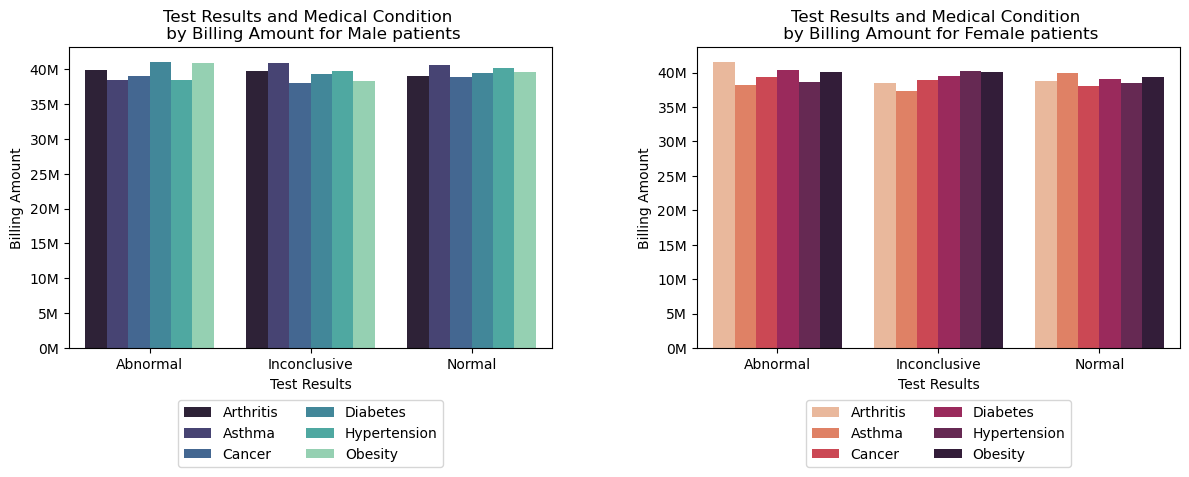

In [83]:
for i in cols_without_mc:
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    
    # Group and plot for Male patients
    group = df_male.groupby([i, 'Medical Condition'], sort= True)['Billing Amount'].sum().reset_index()
    sns.barplot(data=group, x=i, y='Billing Amount', ax=ax[0], palette = 'mako', hue='Medical Condition')
    ax[0].set_title(f'{i} and Medical Condition \n by Billing Amount for Male patients')
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    ax[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))
    
    # Group and plot for Female patients
    group_count = df_female.groupby([i, 'Medical Condition'], sort= True)['Billing Amount'].sum().reset_index()
    sns.barplot(data=group_count, x=i, y='Billing Amount', ax=ax[1], palette = 'rocket_r', hue='Medical Condition')
    ax[1].set_title(f'{i} and Medical Condition \n by Billing Amount for Female patients')
    ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    ax[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)
    plt.show()

Test Results by Medical Condition:
Test Results       Abnormal  Inconclusive  Normal
Medical Condition                                
Arthritis              3188          3088    3032
Asthma                 3009          3029    3147
Cancer                 3118          3060    3049
Diabetes               3168          3046    3090
Hypertension           3012          3091    3142
Obesity                3132          3042    3057


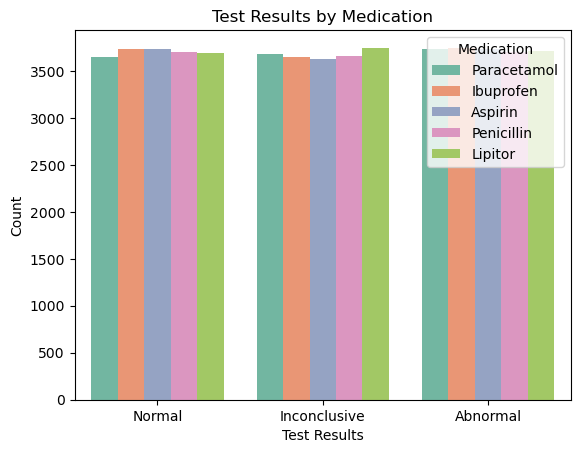

In [84]:
# Test Results by Medical Condition
condition_vs_test = data.groupby('Medical Condition')['Test Results'].value_counts().unstack()
print("Test Results by Medical Condition:")
print(condition_vs_test)

# Visualization for Medication
sns.countplot(data=data, x='Test Results', hue='Medication', palette='Set2')
plt.title('Test Results by Medication')
plt.xlabel('Test Results')
plt.ylabel('Count')
plt.legend(title='Medication')
plt.show()